In [1]:
# https://github.com/statsbomb/open-data
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import numpy as np

In [2]:
partido = sb.events(match_id=3869685)

credentials were not supplied. open data access only


In [3]:
partido.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [15]:
partido.type.value_counts()

Pass               1263
Ball Receipt*      1114
Carry               940
Pressure            361
Ball Recovery       115
Duel                 98
Dribble              54
Block                50
Foul Committed       48
Clearance            45
Goal Keeper          44
Foul Won             44
Shot                 38
Miscontrol           35
Dispossessed         34
Dribbled Past        31
Interception         28
Substitution         13
Half Start           10
Half End             10
Injury Stoppage       9
50/50                 8
Tactical Shift        7
Bad Behaviour         2
Starting XI           2
Offside               1
Player On             1
Shield                1
Player Off            1
Name: type, dtype: int64

In [5]:
mundial = sb.matches(competition_id=43, season_id=106).sort_values(by='match_date')

credentials were not supplied. open data access only


In [12]:
match_ids = list(mundial[(mundial['home_team'] == 'Argentina') | (mundial['away_team'] == 'Argentina')].match_id.values)
match_ids

[3857300, 3857289, 3857264, 3869151, 3869321, 3869519, 3869685]

In [16]:
tiros = pd.DataFrame()
for i in match_ids:
    df = sb.events(match_id=i)
    df = df[df['type'] == 'Shot']
    tiros = tiros.append(df)

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


In [18]:
tiros.shape

(164, 98)

In [21]:
tiros[['x', 'y']] = tiros.location.apply(pd.Series)
tiros[['x', 'y', 'location']]

,x,y,location
3016,104.5,44.5,"[104.5, 44.5]"
3017,108.0,40.0,"[108.0, 40.0]"
3018,98.4,20.2,"[98.4, 20.2]"
3019,113.2,33.8,"[113.2, 33.8]"
3020,101.1,41.8,"[101.1, 41.8]"
...,...,...,...
4240,108.1,40.1,"[108.1, 40.1]"
4241,108.1,40.1,"[108.1, 40.1]"
4242,108.1,40.1,"[108.1, 40.1]"
4243,108.1,40.1,"[108.1, 40.1]"


In [23]:
tiros.possession_team.value_counts()

Argentina       108
France           14
Netherlands      12
Croatia          12
Australia         6
Poland            5
Mexico            4
Saudi Arabia      3
Name: possession_team, dtype: int64

In [24]:
tiros['shot_team'] = np.where(tiros['possession_team'] == 'Argentina', 'Argentina', 'No Argentina')
tiros.shot_team.value_counts() 

Argentina       108
No Argentina     56
Name: shot_team, dtype: int64

In [25]:
tiros_arg = tiros[tiros['shot_team'] == 'Argentina']
tiros_arg.shape

(108, 101)

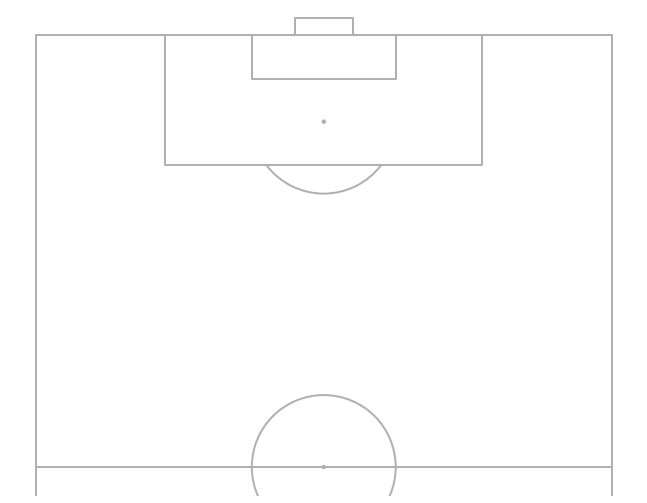

In [26]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    half=True
)

pitch.draw(ax=ax)

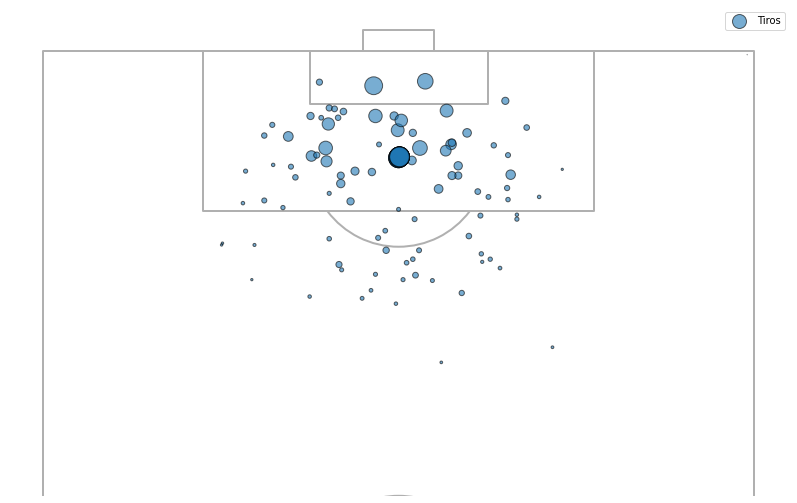

In [44]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box'
)

pitch.draw(ax=ax)

plt.ylim(70, 125)

pitch.scatter(tiros_arg.x, tiros_arg.y, ax=ax, s=tiros_arg.shot_statsbomb_xg*500, alpha=.6, ec='black', label='Tiros')

plt.legend()

In [52]:
goles_arg = tiros_arg[tiros_arg.shot_outcome == 'Goal']
no_goles_arg = tiros_arg[tiros_arg.shot_outcome != 'Goal']
goles_arg.shape, no_goles_arg.shape, tiros_arg.shape

((22, 101), (86, 101), (108, 101))

Text(90, 80, '20.53 xG')

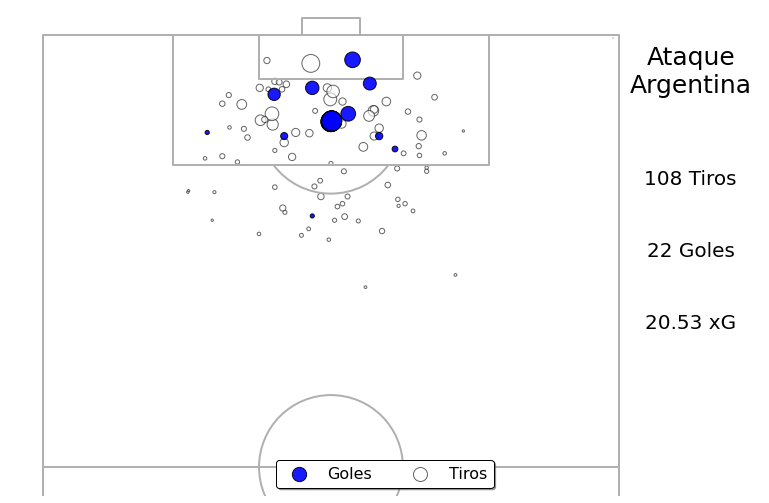

In [84]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    half=True
)

pitch.draw(ax=ax)

#plt.ylim(70, 125)
plt.xlim(-5, 100)

pitch.scatter(goles_arg.x, goles_arg.y, ax=ax, s=goles_arg.shot_statsbomb_xg*500, alpha=.9, ec='black', label='Goles', color='blue', zorder=.99)
pitch.scatter(no_goles_arg.x, no_goles_arg.y, ax=ax, s=no_goles_arg.shot_statsbomb_xg*500, alpha=.6, ec='black', label='Tiros', color='white', zorder=0)

plt.legend(ncol=2, loc='lower center', prop={'size' : 16}, shadow=True, edgecolor='black')

disparos = tiros_arg.shape[0]
goles = goles_arg.shape[0]
xG_total = tiros_arg.shot_statsbomb_xg.sum()

ax.text(90, 115, 'Ataque\nArgentina', va='center', ha='center', fontsize=25)
ax.text(90, 100, f'{disparos} Tiros', va='center', ha='center', fontsize=20)
ax.text(90, 90, f'{goles} Goles', va='center', ha='center', fontsize=20)
ax.text(90, 80, f'{round(xG_total,2)} xG', va='center', ha='center', fontsize=20)


Text(90, 80, '11.75 xG')

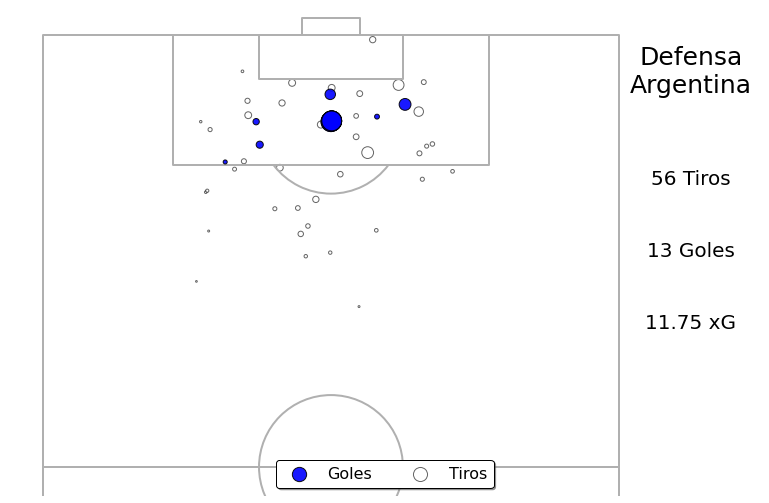

In [90]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    half=True
)

pitch.draw(ax=ax)

#plt.ylim(70, 125)
plt.xlim(-5, 100)

tiros_no_arg = tiros[tiros['shot_team'] != 'Argentina']

goles_no_arg = tiros_no_arg[tiros_no_arg.shot_outcome == 'Goal']
no_goles_no_arg = tiros_no_arg[tiros_no_arg.shot_outcome != 'Goal']

pitch.scatter(goles_no_arg.x, goles_no_arg.y, ax=ax, s=goles_no_arg.shot_statsbomb_xg*500, alpha=.9, ec='black', label='Goles', color='blue', zorder=.99)
pitch.scatter(no_goles_no_arg.x, no_goles_no_arg.y, ax=ax, s=no_goles_no_arg.shot_statsbomb_xg*500, alpha=.6, ec='black', label='Tiros', color='white', zorder=0)

plt.legend(ncol=2, loc='lower center', prop={'size' : 16}, shadow=True, edgecolor='black')

disparos = tiros_no_arg.shape[0]
goles = goles_no_arg.shape[0]
xG_total = tiros_no_arg.shot_statsbomb_xg.sum()

ax.text(90, 115, 'Defensa\nArgentina', va='center', ha='center', fontsize=25)
ax.text(90, 100, f'{disparos} Tiros', va='center', ha='center', fontsize=20)
ax.text(90, 90, f'{goles} Goles', va='center', ha='center', fontsize=20)
ax.text(90, 80, f'{round(xG_total,2)} xG', va='center', ha='center', fontsize=20)

In [89]:
tiros_no_arg.shape

(56, 101)